In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [2]:
# 予想したい日の前日
filedateP = '20220415'
# 結果当日
filedateC = '20220418'

In [3]:
# 予想のために作成したinputデータ（予想したい日の前日）
df_inputai_p = pd.read_csv('data/inputAI_' + filedateP + '.csv', index_col=0, header=[0], parse_dates=[0])

In [4]:
# 機械学習で得た予想結果
predict = np.loadtxt('data/predict_' + filedateP + '.csv', delimiter=',')

In [5]:
row_indices = df_inputai_p.index.values
column_names = ['predict']
df_pred = pd.DataFrame(predict, index=row_indices ,columns=column_names)

In [6]:
df_merge = pd.merge(df_inputai_p, df_pred, left_index=True, right_index=True)

In [7]:
pd.set_option('display.max_rows', 60) 
# defult:60,制限なし:None
pd.set_option('display.max_columns', None) 
# defult:20,制限なし:None

In [8]:
df_merge['pre_val'] = round(df_merge['AdjClose_c'] * df_merge['predict'] + df_merge['AdjClose_c'])

In [9]:
# 値が0より小さかったら-それ以外だったらプラスを返す
def value_sign(pre_value):
    predict = pre_value
    if predict < 0:
        return 'negative'
    else:
        return 'growth'

df_merge['pre_sign'] = df_merge['predict'].apply(value_sign)

In [10]:
df_merge

,PER,PBR,HAITO,ROE_x,ROA_x,MA05,MA25,MA75,RSI,key,AdjClose_c,Close_c,High_c,Low_c,Open_c,Volume_c,AdjClose_p,Close_p,High_p,Low_p,Open_p,Volume_p,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,INDR4,TSPLB,TSPLS,PIN80B,PIN80S,Diff,総資産,純資産,株主資本,利益剰余金,短期借入金,長期借入金,BPS,自己資本比率,営業CF,投資CF,財務CF,設備投資,現金同等物,営業CFマージン,売上高,営業利益,経常利益,純利益,EPS,ROE_y,ROA_y,一株配当,剰余金の配当,自社株買い,配当性向,総還元性向,純資産配当率,predict,pre_val,pre_sign
コード,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1301,9.06,0.86,2.47,10.5,4.3,-0.31,-3.54,0.29,25.66,1301.T,3235.0,3235.0,3250.0,3225.0,3250.0,9400.0,3260.0,3260.0,3265.0,3240.0,3260.0,8200.0,3260.0,3260.0,3280.0,3230.0,3240.0,22400.0,3220.0,3220.0,3270.0,3200.0,3235.0,33000.0,3250.0,3250.0,3280.0,3235.0,3250.0,15900.0,3275.0,3275.0,3330.0,3260.0,3330.0,20900.0,3330.0,3330.0,3360.0,3315.0,3350.0,23700.0,3385.0,3385.0,3415.0,3380.0,3410.0,16800.0,3405.0,3405.0,3425.0,3380.0,3420.0,16000.0,3420.0,3420.0,3435.0,3390.0,3435.0,27600.0,0,0,0,0,0,-0.007728,1.163310e+11,3.997500e+10,3.530000e+10,2.873700e+10,8.056000e+09,3.272000e+10,3753.75,34.7,5.997000e+09,-5.270000e+08,-4.627000e+09,0.000000e+00,7.097000e+09,2.41,2.491970e+11,4.657000e+09,4.879000e+09,3.838000e+09,356.90,9.50,3.30,80.0,7.540000e+08,82000000.0,19.65,21.78,2.4,0.000353,3236.0,growth
1352,12.76,1.46,1.64,12.0,2.9,-0.02,-0.11,21.62,40.00,1352.T,1217.0,1217.0,1217.0,1217.0,1217.0,400.0,1217.0,1217.0,1218.0,1217.0,1217.0,1700.0,1218.0,1218.0,1218.0,1217.0,1217.0,2400.0,1216.0,1216.0,1218.0,1216.0,1217.0,5400.0,1218.0,1218.0,1218.0,1216.0,1218.0,2500.0,1219.0,1219.0,1220.0,1219.0,1219.0,7800.0,1219.0,1219.0,1220.0,1219.0,1220.0,2300.0,1219.0,1219.0,1220.0,1219.0,1220.0,4300.0,1219.0,1219.0,1220.0,1219.0,1220.0,10800.0,1220.0,1220.0,1220.0,1219.0,1219.0,13600.0,0,0,0,0,0,0.000000,4.138800e+10,7.855000e+09,6.946000e+09,3.243000e+09,1.900000e+09,1.878700e+10,834.05,16.9,4.367000e+09,-1.817000e+09,-6.620000e+08,-6.110000e+08,4.009000e+09,5.24,8.326500e+10,1.230000e+09,1.163000e+09,7.980000e+08,95.30,11.43,1.93,20.0,1.670000e+08,0.0,20.93,0.00,2.4,-0.000532,1216.0,negative
1376,12.84,0.85,1.83,6.8,3.7,-1.18,-1.69,2.39,47.72,1376.T,1581.0,1581.0,1610.0,1581.0,1610.0,13100.0,1603.0,1603.0,1608.0,1576.0,1576.0,13300.0,1582.0,1582.0,1600.0,1567.0,1600.0,15400.0,1611.0,1611.0,1627.0,1611.0,1621.0,11200.0,1622.0,1622.0,1633.0,1621.0,1625.0,9000.0,1625.0,1625.0,1629.0,1610.0,1611.0,9500.0,1610.0,1610.0,1638.0,1601.0,1638.0,11400.0,1635.0,1635.0,1651.0,1635.0,1649.0,15600.0,1646.0,1646.0,1649.0,1617.0,1617.0,12200.0,1617.0,1617.0,1650.0,1617.0,1626.0,11300.0,0,0,0,1,0,-0.013915,4.745203e+10,2.169695e+10,2.083818e+10,1.771199e+10,0.000000e+00,0.000000e+00,1859.82,45.7,2.294651e+09,-8.389950e+08,-3.847630e+08,-1.028317e+09,5.486002e+09,3.78,6.077909e+10,1.661398e+09,1.765679e+09,1.436066e+09,123.09,6.62,3.03,29.0,3.286890e+08,781000.0,22.89,22.94,1.6,-0.000846,1580.0,negative
1377,23.45,1.60,0.95,7.2,7.9,-1.59,6.56,15.17,62.07,1377.T,4015.0,4015.0,4085.0,3960.0,4050.0,233700.0,4065.0,4065.0,4120.0,4020.0,4085.0,240900.0,4155.0,4155.0,4165.0,4080.0,4115.0,184600.0,4120.0,4120.0,4210.0,4015.0,4030.0,403000.0,4045.0,4045.0,4060.0,3810.0,3840.0,494900.0,3700.0,3700.0,3730.0,3660.0,3700.0,135100.0,3630.0,3630.0,3660.0,3615.0,3620.0,98900.0,3635.0,3635.0,3680.0,3625.0,3650.0,163800.0,3675.0,3675.0,3725.0,3675.0,3705.0,113900.0,3725.0,3725.0,3730.0,3675.0,3685.0,94200.0,0,0,0,0,0,-0.012453,1.330770e+11,1.118980e+11,1.109050e+11,9.109900e+10,1.894000e+09,8.940000e+08,2503.80,83.9,1.136200e+10,-5.165000e+09,-4.005000e+09,-4.689000e+09,1.475800e+10,16.41,6.921800e+10,9.725000e+09,1.007800e+10,7.636000e+09,171.22,6.84,5.74,38.0,1.472000e+09,2000000.0,19.28,19.30,1.6,-0.004169,3998.0,negative
1379,15.30,1.15,3.04,7.7,6.5,-0.22,-0.07,0.92,46.36,1379.T,1971.0,1971.0,1973.0,1955.0,1955.0,49600.0,1970.0,1970.0,1992.0,1962.0,1991.0,53200.0,1991.0,1991.0

In [11]:
# 実際の結果データ
df_inputai_c = pd.read_csv('data/inputAI_' + filedateC + '.csv', index_col=0, header=[0], parse_dates=[0])

In [12]:
# 配列内の各要素に含まれる特定の文字列を置換・削除する場合、単純なreplaceだとエラーになる
colums_list = df_inputai_c.columns
string = ",".join(colums_list)
string_new = string.replace('AdjClose_c,', '')
colums_list_new = string_new.split(",")

In [13]:
df_inputai_c.drop(columns=colums_list_new, inplace=True)

In [14]:
df_inputai_c.rename(columns={'AdjClose_c': 'res_val'}, inplace=True)

In [15]:
df_merge2 = pd.merge(df_merge, df_inputai_c, left_index=True, right_index=True)

In [16]:
# 値が0より小さかったら-それ以外だったらプラスを返す
def result_sign(input_value):
    adj, res_val = input_value
    if res_val - adj < 0:
        return 'negative'
    else:
        return 'growth'

df_merge2['res_sign'] = df_merge2[['AdjClose_c','res_val']].apply(result_sign, axis=1)

In [17]:
df_merge2['error'] = df_merge2['res_val'] - df_merge2['pre_val']

In [18]:
df_merge2['match_sign'] = df_merge2['res_sign'] == df_merge2['pre_sign']

In [19]:
df_merge2

,PER,PBR,HAITO,ROE_x,ROA_x,MA05,MA25,MA75,RSI,key,AdjClose_c,Close_c,High_c,Low_c,Open_c,Volume_c,AdjClose_p,Close_p,High_p,Low_p,Open_p,Volume_p,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,INDR4,TSPLB,TSPLS,PIN80B,PIN80S,Diff,総資産,純資産,株主資本,利益剰余金,短期借入金,長期借入金,BPS,自己資本比率,営業CF,投資CF,財務CF,設備投資,現金同等物,営業CFマージン,売上高,営業利益,経常利益,純利益,EPS,ROE_y,ROA_y,一株配当,剰余金の配当,自社株買い,配当性向,総還元性向,純資産配当率,predict,pre_val,pre_sign,res_val,res_sign,error,match_sign
コード,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1301,9.06,0.86,2.47,10.5,4.3,-0.31,-3.54,0.29,25.66,1301.T,3235.0,3235.0,3250.0,3225.0,3250.0,9400.0,3260.0,3260.0,3265.0,3240.0,3260.0,8200.0,3260.0,3260.0,3280.0,3230.0,3240.0,22400.0,3220.0,3220.0,3270.0,3200.0,3235.0,33000.0,3250.0,3250.0,3280.0,3235.0,3250.0,15900.0,3275.0,3275.0,3330.0,3260.0,3330.0,20900.0,3330.0,3330.0,3360.0,3315.0,3350.0,23700.0,3385.0,3385.0,3415.0,3380.0,3410.0,16800.0,3405.0,3405.0,3425.0,3380.0,3420.0,16000.0,3420.0,3420.0,3435.0,3390.0,3435.0,27600.0,0,0,0,0,0,-0.007728,1.163310e+11,3.997500e+10,3.530000e+10,2.873700e+10,8.056000e+09,3.272000e+10,3753.75,34.7,5.997000e+09,-5.270000e+08,-4.627000e+09,0.000000e+00,7.097000e+09,2.41,2.491970e+11,4.657000e+09,4.879000e+09,3.838000e+09,356.90,9.50,3.30,80.0,7.540000e+08,82000000.0,19.65,21.78,2.4,0.000353,3236.0,growth,3205.0,negative,-31.0,False
1352,12.76,1.46,1.64,12.0,2.9,-0.02,-0.11,21.62,40.00,1352.T,1217.0,1217.0,1217.0,1217.0,1217.0,400.0,1217.0,1217.0,1218.0,1217.0,1217.0,1700.0,1218.0,1218.0,1218.0,1217.0,1217.0,2400.0,1216.0,1216.0,1218.0,1216.0,1217.0,5400.0,1218.0,1218.0,1218.0,1216.0,1218.0,2500.0,1219.0,1219.0,1220.0,1219.0,1219.0,7800.0,1219.0,1219.0,1220.0,1219.0,1220.0,2300.0,1219.0,1219.0,1220.0,1219.0,1220.0,4300.0,1219.0,1219.0,1220.0,1219.0,1220.0,10800.0,1220.0,1220.0,1220.0,1219.0,1219.0,13600.0,0,0,0,0,0,0.000000,4.138800e+10,7.855000e+09,6.946000e+09,3.243000e+09,1.900000e+09,1.878700e+10,834.05,16.9,4.367000e+09,-1.817000e+09,-6.620000e+08,-6.110000e+08,4.009000e+09,5.24,8.326500e+10,1.230000e+09,1.163000e+09,7.980000e+08,95.30,11.43,1.93,20.0,1.670000e+08,0.0,20.93,0.00,2.4,-0.000532,1216.0,negative,1218.0,growth,2.0,False
1376,12.84,0.85,1.83,6.8,3.7,-1.18,-1.69,2.39,47.72,1376.T,1581.0,1581.0,1610.0,1581.0,1610.0,13100.0,1603.0,1603.0,1608.0,1576.0,1576.0,13300.0,1582.0,1582.0,1600.0,1567.0,1600.0,15400.0,1611.0,1611.0,1627.0,1611.0,1621.0,11200.0,1622.0,1622.0,1633.0,1621.0,1625.0,9000.0,1625.0,1625.0,1629.0,1610.0,1611.0,9500.0,1610.0,1610.0,1638.0,1601.0,1638.0,11400.0,1635.0,1635.0,1651.0,1635.0,1649.0,15600.0,1646.0,1646.0,1649.0,1617.0,1617.0,12200.0,1617.0,1617.0,1650.0,1617.0,1626.0,11300.0,0,0,0,1,0,-0.013915,4.745203e+10,2.169695e+10,2.083818e+10,1.771199e+10,0.000000e+00,0.000000e+00,1859.82,45.7,2.294651e+09,-8.389950e+08,-3.847630e+08,-1.028317e+09,5.486002e+09,3.78,6.077909e+10,1.661398e+09,1.765679e+09,1.436066e+09,123.09,6.62,3.03,29.0,3.286890e+08,781000.0,22.89,22.94,1.6,-0.000846,1580.0,negative,1582.0,growth,2.0,False
1377,23.45,1.60,0.95,7.2,7.9,-1.59,6.56,15.17,62.07,1377.T,4015.0,4015.0,4085.0,3960.0,4050.0,233700.0,4065.0,4065.0,4120.0,4020.0,4085.0,240900.0,4155.0,4155.0,4165.0,4080.0,4115.0,184600.0,4120.0,4120.0,4210.0,4015.0,4030.0,403000.0,4045.0,4045.0,4060.0,3810.0,3840.0,494900.0,3700.0,3700.0,3730.0,3660.0,3700.0,135100.0,3630.0,3630.0,3660.0,3615.0,3620.0,98900.0,3635.0,3635.0,3680.0,3625.0,3650.0,163800.0,3675.0,3675.0,3725.0,3675.0,3705.0,113900.0,3725.0,3725.0,3730.0,3675.0,3685.0,94200.0,0,0,0,0,0,-0.012453,1.330770e+11,1.118980e+11,1.109050e+11,9.109900e+10,1.894000e+09,8.940000e+08,2503.80,83.9,1.136200e+10,-5.165000e+09,-4.005000e+09,-4.689000e+09,1.475800e+10,16.41,6.921800e+10,9.725000e+09,1.007800e+10,7.636000e+09,171.22,6.84,5.74,38.0,1.472000e+09,2000000.0,19.28,19.30,1.6,-0.004169,3998.0,negative,4000.0,negative,2.0,True
1379,15.30,1.15,3.0

In [20]:
# 行数
print('全体の行数は、{:0.0f}'.format(len(df_merge2)))
#予想と結果の符号が一致
# print('予想と結果の符号が一致した行数は、{:0.0f}'.format((df_merge2['pre_sign'] == df_merge2['res_sign']).sum()))
print('予想と結果の符号が一致した行数は、{:0.0f}'.format(df_merge2['match_sign'].sum()))

全体の行数は、1892
予想と結果の符号が一致した行数は、747


In [21]:
result_per = df_merge2['match_sign'].sum() / len(df_merge2)*100
print('予想と結果の符号が一致となった割合は、{:0.2f}%'.format(result_per))

予想と結果の符号が一致となった割合は、39.48%


In [22]:
# 必要なモジュールをインポートします。
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


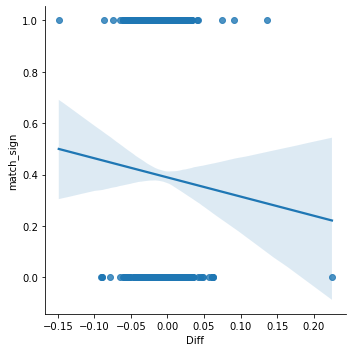

In [23]:
# 年齢と生存率のグラフを描いてみましょう。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.lmplot('Diff','match_sign',data=df_merge2)

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSPLS', ylabel='count'>

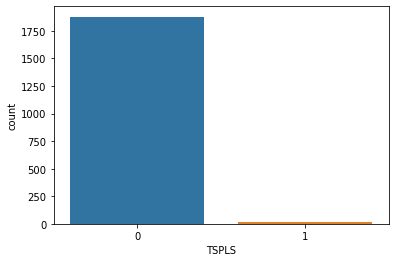

In [24]:
# 正負予想の数を分類します。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.countplot('TSPLS',data=df_merge2)

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='match_sign', ylabel='count'>

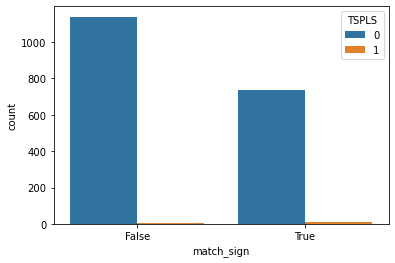

In [25]:
# 正負予想の数を分類します。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.countplot('match_sign',hue='TSPLS',data=df_merge2)

<AxesSubplot:>

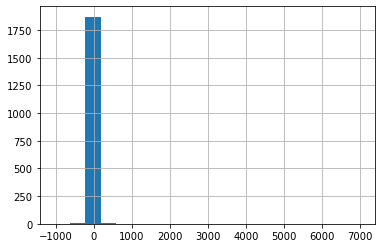

In [26]:
# pandasで簡単にヒストグラムを描く方法です。
df_merge2['error'].hist(bins=20)

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


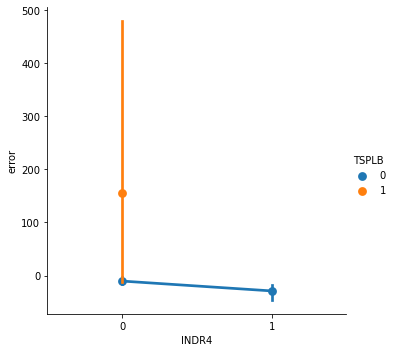

In [27]:
# こういった解析には、factorplotが便利です。
sns.factorplot('INDR4','error',hue='TSPLB',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


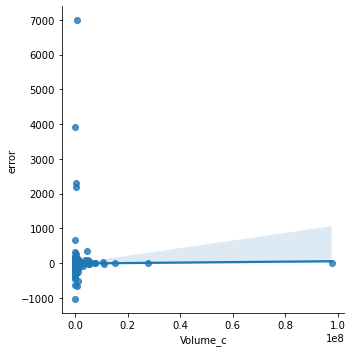

In [28]:
# 出来高と誤差率のグラフを描いてみましょう。
sns.lmplot('Volume_c','error',data=df_merge2)

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


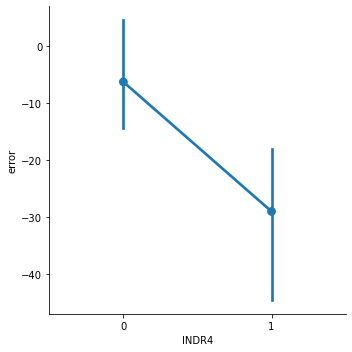

In [29]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('INDR4','error',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


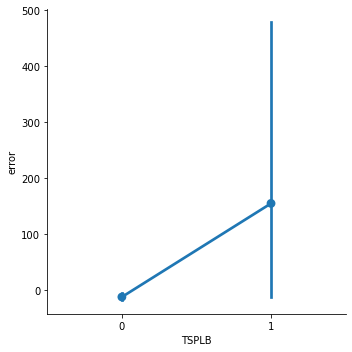

In [30]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('TSPLB','error',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


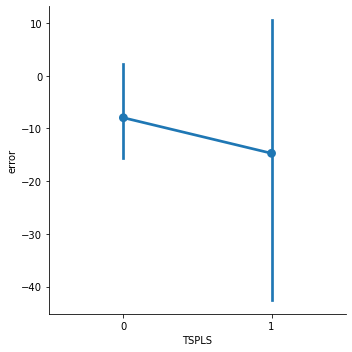

In [31]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('TSPLS','error',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


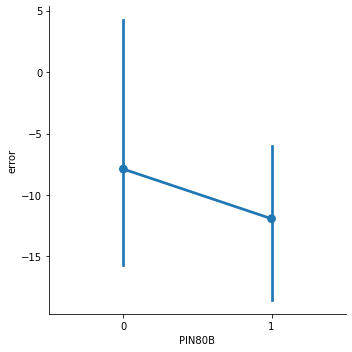

In [32]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('PIN80B','error',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


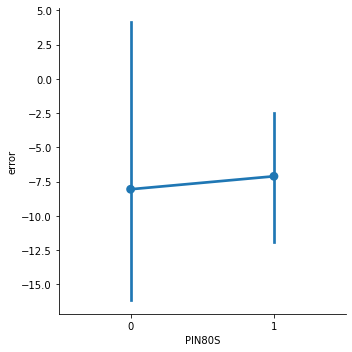

In [33]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('PIN80S','error',data=df_merge2, order=[0,1])

In [34]:
df_merge.to_csv('data/preparation_' + filedateP + '.csv')

In [35]:
df_merge2.to_csv('data/result_' + filedateP + '.csv')